In [1]:
import pandas as pd
import numpy as np
X=pd.read_csv('./stream_Xfinal.csv',dtype=object).iloc[:,1:]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83526 entries, 0 to 83525
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   component_name                  83526 non-null  object
 1   component_version               83526 non-null  object
 2   cvm_cpu                         76843 non-null  object
 3   cvm_cpu_qos                     21195 non-null  object
 4   cvm_cpu_type                    74843 non-null  object
 5   cvm_gpu_type                    999 non-null    object
 6   cvm_memory                      76815 non-null  object
 7   cvm_os_type                     76837 non-null  object
 8   cvm_version                     69524 non-null  object
 9   host_configured_clock_speed     8189 non-null   object
 10  host_cpu_isolation              56 non-null     object
 11  host_cpu_isolation:dpdk         2586 non-null   object
 12  host_cpu_isolation:host         2586 non-null 

In [2]:
# 舍弃阈值
threshold=len(X)*0.5
delete_column=[]
for column in X.columns:
    if(X[column].count()<threshold):
        delete_column.append(column)
X.drop(columns=delete_column,inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83526 entries, 0 to 83525
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   component_name     83526 non-null  object
 1   component_version  83526 non-null  object
 2   cvm_cpu            76843 non-null  object
 3   cvm_cpu_type       74843 non-null  object
 4   cvm_memory         76815 non-null  object
 5   cvm_os_type        76837 non-null  object
 6   cvm_version        69524 non-null  object
 7   platform           83214 non-null  object
 8   test_name          83526 non-null  object
 9   tool_name          83526 non-null  object
 10  tool_version       83526 non-null  object
 11  results_key        83526 non-null  object
dtypes: object(12)
memory usage: 7.6+ MB


In [3]:
#相同配置取最后一项，这是由于数据有时序性，且发现数据集中较早测的有严重偏差
X=X.drop_duplicates(keep='last')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18435 entries, 1 to 83525
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   component_name     18435 non-null  object
 1   component_version  18435 non-null  object
 2   cvm_cpu            18099 non-null  object
 3   cvm_cpu_type       16511 non-null  object
 4   cvm_memory         18085 non-null  object
 5   cvm_os_type        18050 non-null  object
 6   cvm_version        15512 non-null  object
 7   platform           18338 non-null  object
 8   test_name          18435 non-null  object
 9   tool_name          18435 non-null  object
 10  tool_version       18435 non-null  object
 11  results_key        18435 non-null  object
dtypes: object(12)
memory usage: 1.8+ MB


In [4]:
X=X[["cvm_cpu","results_key","cvm_memory","cvm_cpu_type","cvm_os_type"]]
X["cvm_cpu"]=X["cvm_cpu"].fillna(-1)
X["cvm_memory"]=X["cvm_memory"].fillna(-1)

In [5]:
for i in range(len(X)):
    index=X.index[i]
    try:
        X["cvm_memory"][index]=X["cvm_memory"][index].split(" ")[0]
    except:
        continue
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18435 entries, 1 to 83525
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cvm_cpu       18435 non-null  object
 1   results_key   18435 non-null  object
 2   cvm_memory    18435 non-null  object
 3   cvm_cpu_type  16511 non-null  object
 4   cvm_os_type   18050 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [6]:
X[["cvm_cpu","cvm_memory"]]=X[["cvm_cpu","cvm_memory"]].astype(int)
X_encode=pd.get_dummies(X)
X_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18435 entries, 1 to 83525
Columns: 211 entries, cvm_cpu to cvm_os_type_tlinux
dtypes: int32(2), uint8(209)
memory usage: 4.5 MB


In [7]:
y_final=pd.read_csv('./stream_yfinal.csv').iloc[:,1:]
y_final=y_final.iloc[X.index]
y_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18435 entries, 1 to 83525
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   #stream_add         1515 non-null   float64
 1   #stream_copy        17273 non-null  float64
 2   #stream_copy_m      3 non-null      float64
 3   #stream_copy_numa   0 non-null      float64
 4   #stream_ht1_copy    1049 non-null   float64
 5   #stream_ht1_triad   1049 non-null   float64
 6   #stream_ht2_copy    1049 non-null   float64
 7   #stream_ht2_triad   1049 non-null   float64
 8   #stream_scale       1515 non-null   float64
 9   #stream_triad       17273 non-null  float64
 10  #stream_triad_m     3 non-null      float64
 11  #stream_triad_numa  0 non-null      float64
 12  stream_add          15561 non-null  float64
 13  stream_add_m        3 non-null      float64
 14  stream_add_numa     0 non-null      float64
 15  stream_ht1_add      1049 non-null   float64
 16  stre

In [8]:
threshold = len(y_final) * 0.5
delete_column = y_final.apply(lambda x: x.count() < threshold, axis=0)
y_final.drop(columns=y_final.columns[delete_column], inplace=True)
delete_column

#stream_add            True
#stream_copy          False
#stream_copy_m         True
#stream_copy_numa      True
#stream_ht1_copy       True
#stream_ht1_triad      True
#stream_ht2_copy       True
#stream_ht2_triad      True
#stream_scale          True
#stream_triad         False
#stream_triad_m        True
#stream_triad_numa     True
stream_add            False
stream_add_m           True
stream_add_numa        True
stream_ht1_add         True
stream_ht1_copy        True
stream_ht1_scale       True
stream_ht1_triad       True
stream_ht2_add         True
stream_ht2_copy        True
stream_ht2_scale       True
stream_ht2_triad       True
stream_scale          False
stream_scale_m         True
stream_scale_numa      True
dtype: bool

In [9]:
for column in y_final:
    y_final[column].fillna(y_final[column].mean(),inplace=True)
y_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18435 entries, 1 to 83525
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   #stream_copy   18435 non-null  float64
 1   #stream_triad  18435 non-null  float64
 2   stream_add     18435 non-null  float64
 3   stream_scale   18435 non-null  float64
dtypes: float64(4)
memory usage: 720.1 KB


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encode, y_final, test_size=0.2, random_state=1)

In [11]:
from sklearn.multioutput import MultiOutputRegressor

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
# 初始化 MLPRegressor 模型
mlp = MLPRegressor(hidden_layer_sizes=(30, 30), max_iter=2000, solver='adam', random_state=42)

# 训练 MLPRegressor 模型
mlp.fit(X_train,y_train)

# 预测结果
y_pred_mlp=mlp.predict(X_test)

# 计算评价指标
r2_mlp = r2_score(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

In [13]:
# 导入随机森林回归模型
from sklearn.ensemble import RandomForestRegressor
# 初始化 RandomForestRegressor 模型
rf = RandomForestRegressor(n_estimators=110, max_depth=35, random_state=42,n_jobs=-1)

mor_rf = MultiOutputRegressor(rf)
# 训练 RandomForestRegressor 模型
mor_rf.fit(X_train, y_train)

# 预测结果
y_pred_rf = mor_rf.predict(X_test)

# 计算评价指标
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 初始化 KNeighborsRegressor 模型
# knn = KNeighborsRegressor(n_jobs=-1,n_neighbors=25,weights='distance',metric='euclidean')
knn = KNeighborsRegressor(n_neighbors=25,weights='distance',metric='euclidean')

# 训练 KNeighborsRegressor 模型

knn.fit(X_train, y_train)

# 预测结果
y_pred_knn = knn.predict(X_test)

# 计算评价指标
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)   

In [15]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize XGBRegressor model
xgb = XGBRegressor(n_estimators=110, learning_rate=0.3, max_depth=8, objective='reg:squarederror',n_jobs=-1,random_state=42)
# xgb = XGBRegressor(n_estimators=110, learning_rate=0.3, max_depth=8, objective='reg:squarederror',random_state=42)

# Train XGBRegressor model
xgb.fit(X_train, y_train)

# Predict results
y_pred_xgb = xgb.predict(X_test)

# Calculate evaluation metrics
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)


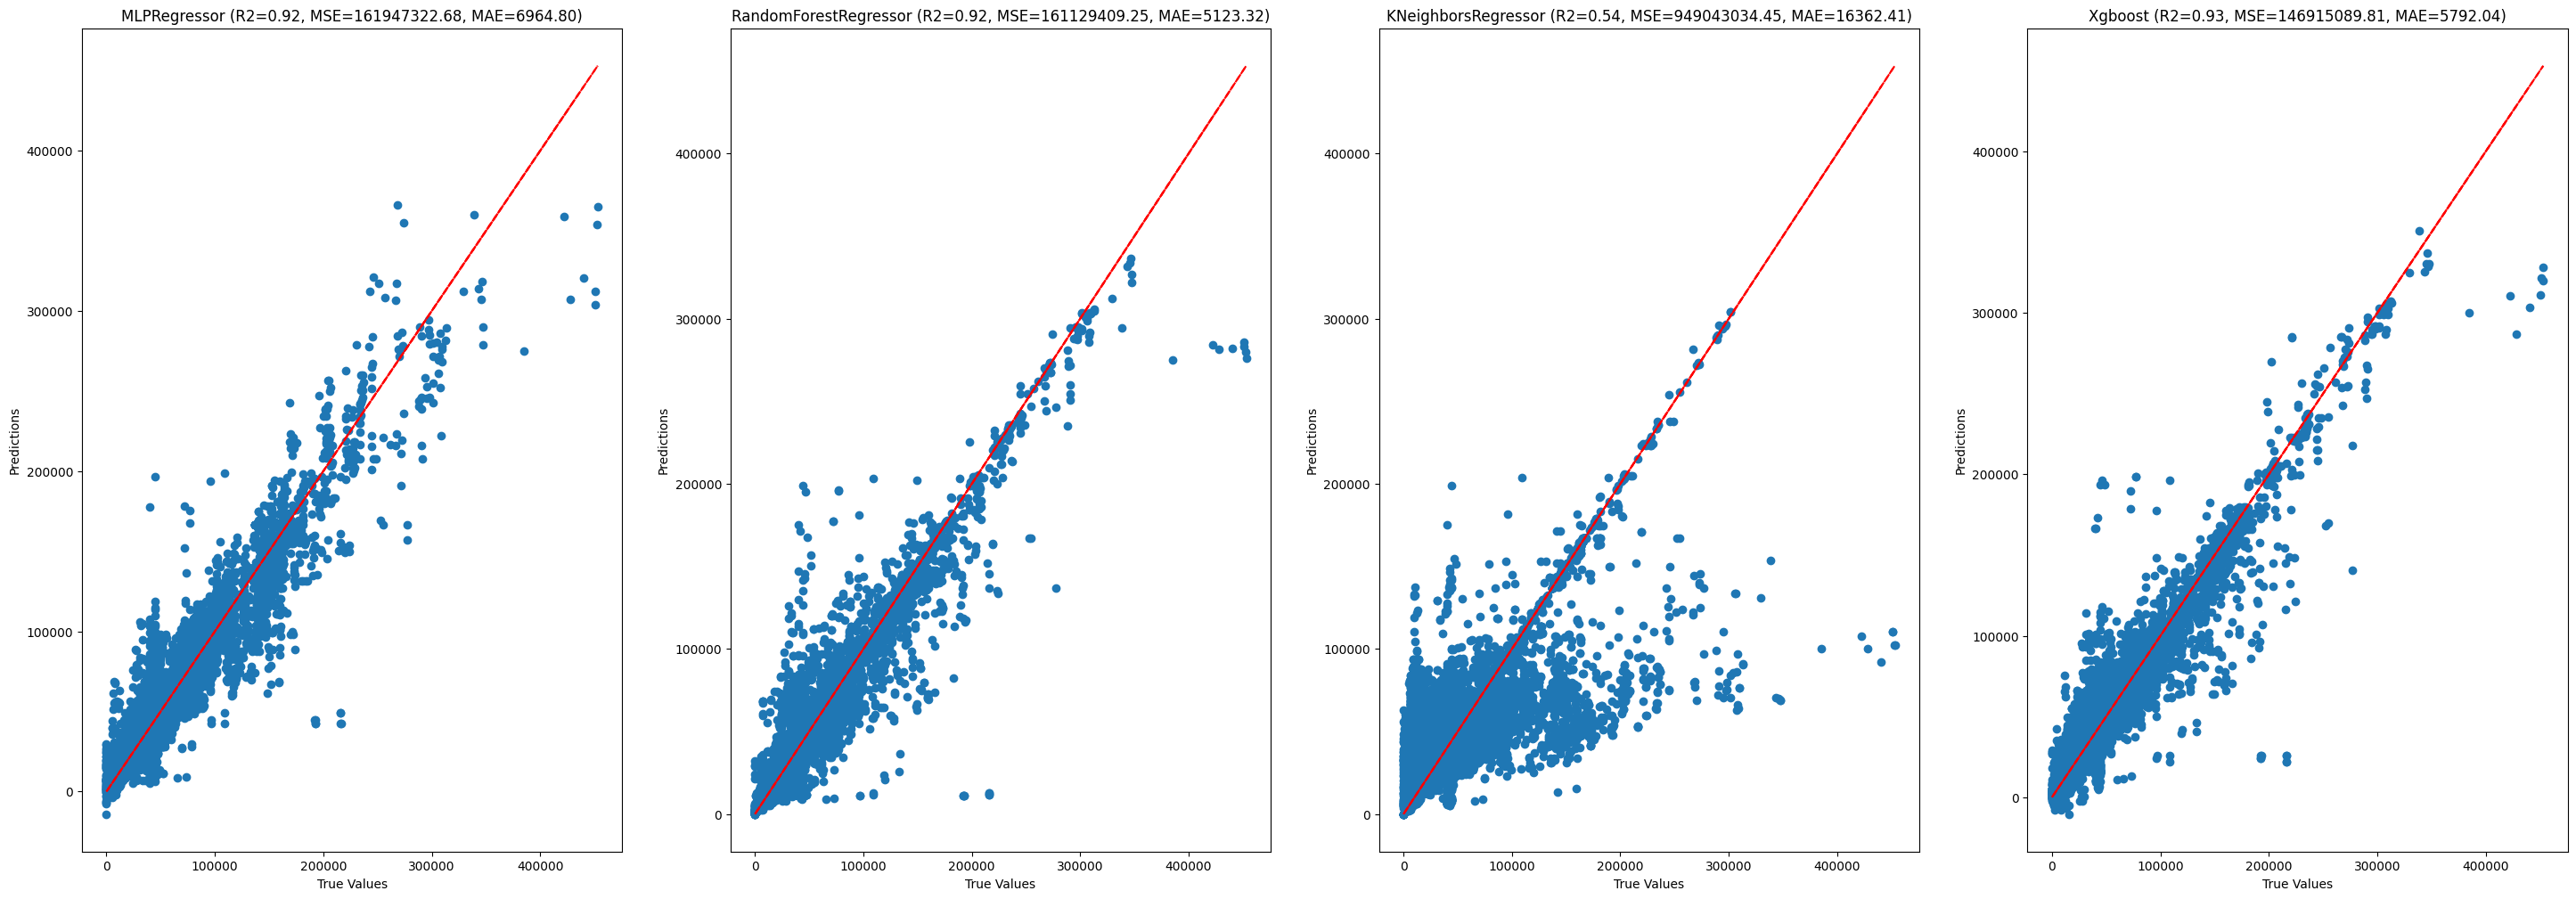

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
# 可视化预测结果
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(36, 12))

# 绘制 MLPRegressor 预测结果
ax1.scatter(y_test, y_pred_mlp)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
ax1.set_xlabel('True Values')
ax1.set_ylabel('Predictions')
ax1.set_title(f'MLPRegressor (R2={r2_mlp:.2f}, MSE={mse_mlp:.2f}, MAE={mae_mlp:.2f})')

# 绘制 RandomForestRegressor 预测结果
ax2.scatter(y_test, y_pred_rf)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
ax2.set_xlabel('True Values')
ax2.set_ylabel('Predictions')
ax2.set_title(f'RandomForestRegressor (R2={r2_rf:.2f}, MSE={mse_rf:.2f}, MAE={mae_rf:.2f})')

# 绘制 KNeighborsRegressor 预测结果
ax3.scatter(y_test, y_pred_knn)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
ax3.set_xlabel('True Values')
ax3.set_ylabel('Predictions')
ax3.set_title(f'KNeighborsRegressor (R2={r2_knn:.2f}, MSE={mse_knn:.2f}, MAE={mae_knn:.2f})')

# 绘制 Xgboost 预测结果
ax4.scatter(y_test, y_pred_xgb)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
ax4.set_xlabel('True Values')
ax4.set_ylabel('Predictions')
ax4.set_title(f'Xgboost (R2={r2_xgb:.2f}, MSE={mse_xgb:.2f}, MAE={mae_xgb:.2f})')

plt.show()
plt.savefig('result.png')
